In [3]:
import pandas as pd

# To do linear algebra
import numpy as np

# To create plots
import matplotlib.pyplot as plt
import seaborn as sns
# To create interactive plots
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.graph_objects as go

# To shift lists
from collections import deque

C:\Users\91878\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
!pip install numpy

In [5]:
# Load data for all movies
movie_titles = pd.read_csv(r'C:\Users\91878\OneDrive\Desktop\movie_titles.csv')

print(f'Shape Movie-Titles:\t{movie_titles.shape}')
movie_titles.head()

Shape Movie-Titles:	(17770, 4)


,Unnamed: 0,movie_id,year,name
0,0,1,2003.0,Dinosaur Planet
1,1,2,2004.0,Isle of Man TT 2004 Review
2,2,3,1997.0,Character
3,3,4,1994.0,Paula Abdul's Get Up & Dance
4,4,5,2004.0,The Rise and Fall of ECW


In [6]:
# Load data for all movies
df = pd.read_csv(r'C:\Users\91878\OneDrive\Desktop\df_avgRating_with_usersCount.csv')

print(f'Shape Movie-Titles:\t{df.shape}')
df.head()

Shape Movie-Titles:	(4499, 3)


,movie_id,rating,user_id
0,1,3.749543,547
1,2,3.558621,145
2,3,3.641153,2012
3,4,2.739437,142
4,5,3.919298,1140


In [7]:
movie_titles.drop('Unnamed: 0', inplace= True, axis= 1)
movie_titles

,movie_id,year,name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [9]:
df.rename(columns = {'user_id':'users_count'}, inplace = True)
df.head()

,movie_id,rating,users_count
0,1,3.749543,547
1,2,3.558621,145
2,3,3.641153,2012
3,4,2.739437,142
4,5,3.919298,1140


In [10]:
df.isnull().sum()

movie_id       0
rating         0
users_count    0
dtype: int64

In [11]:
df.set_index('users_count').sort_index()

,movie_id,rating
users_count,,
36,4362,2.000000
39,4338,2.948718
42,3656,3.214286
43,915,2.837209
44,4294,4.272727
...,...,...
154832,571,3.962585
156183,4432,3.755364
160454,3860,3.434517


In [12]:
movie_titles.isnull().sum()

movie_id    0
year        0
name        0
dtype: int64

In [13]:
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie_id  17770 non-null  int64  
 1   year      17770 non-null  float64
 2   name      17770 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 416.6+ KB


In [45]:
def custom_rating(users,rating):
    if users<2000 and rating>4:
        return 0
    elif users>2000 and rating>4:
        return 1
    else:
        return 2
        
df['target'] = df.apply(lambda x: custom_rating(x['users_count'],x['rating']),axis=1)

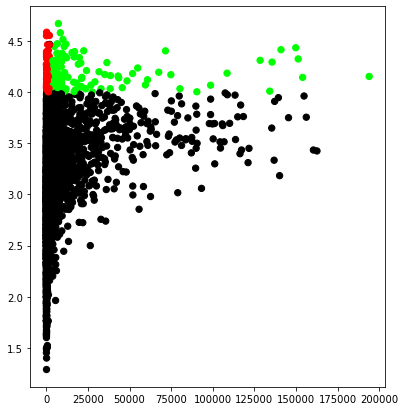

In [46]:
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black','blue'])
plt.subplot(1, 2, 1)
plt.scatter(df.users_count,df.rating,c=colormap[df.target], s=40)

In [56]:
X=pd.DataFrame(df)
y=pd.DataFrame(df.target)

In [54]:
from sklearn.cluster import AgglomerativeClustering

H_clustering = AgglomerativeClustering(n_clusters=3)
H_clustering.fit(X)
predY = H_clustering.labels_
predY

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Hierarchical clustering')

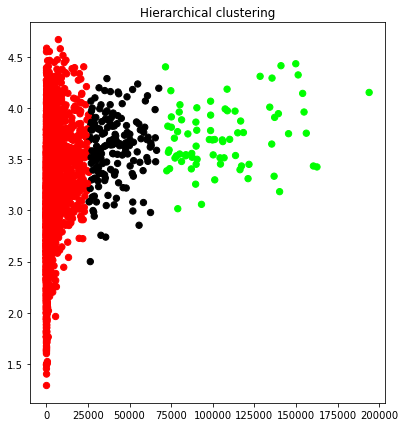

In [55]:
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black','blue'])
plt.subplot(1, 2, 2)
predY = H_clustering.labels_
#predY = np.choose(predY, [1, 0, 2]).astype(np.int64)
plt.scatter(df.users_count, df.rating, c=colormap[predY], s=40)
plt.title('Hierarchical clustering')

In [57]:
import sklearn.metrics as sm
#Calculate Accuracy
sm.accuracy_score(y, predY)

0.05979106468104023

In [58]:
#Show the confusin Matrix
sm.confusion_matrix(y, predY)

array([[ 110,    0,    0],
       [ 112,   14,   18],
       [4037,   63,  145]], dtype=int64)

In [59]:
# Show Precision
sm.precision_score(y, predY, average=None)

array([0.02582766, 0.18181818, 0.88957055])

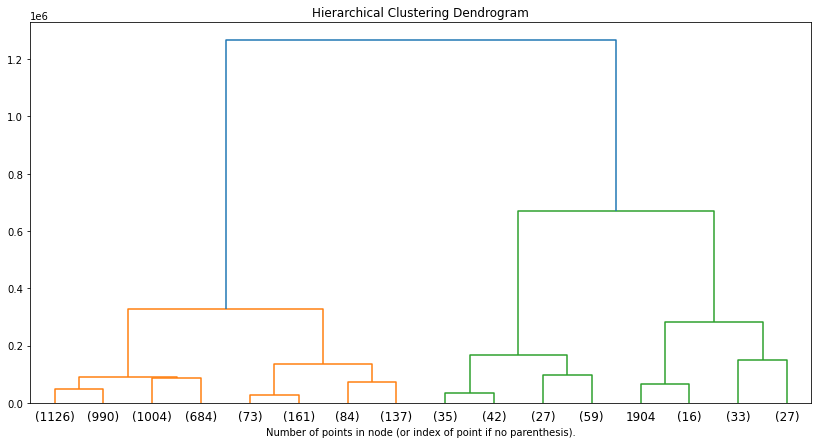

In [62]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(H_clustering.children_.shape[0])
    n_samples = len(H_clustering.labels_)
    for i, merge in enumerate(H_clustering.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [H_clustering.children_, H_clustering.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
plt.figure(figsize=(14,7))    
H_clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
H_clustering = H_clustering.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(H_clustering, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

TEXT ANALYSIS 

In [65]:
!pip install wordcloud

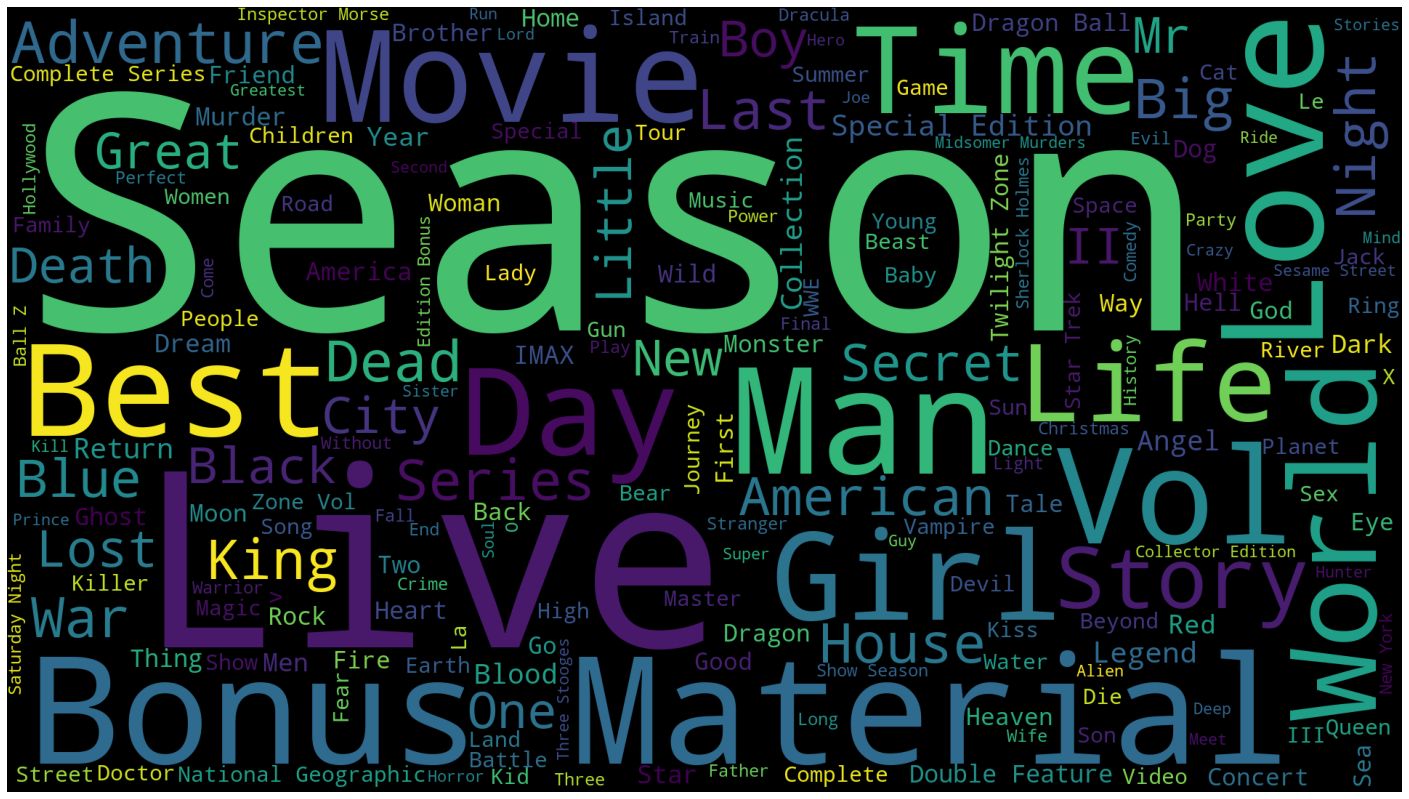

In [66]:
from wordcloud import WordCloud

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(movie_titles.name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()